# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import random
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
roll_dice = pd.DataFrame(random.choices(list(range(1,7)), k=10), 
                         columns=['result']).reset_index().rename(columns={'index': 'try'})
roll_dice

,try,result
0,0,1
1,1,2
2,2,2
3,3,2
4,4,4
5,5,1
6,6,1
7,7,1
8,8,3
9,9,2


#### 2.- Plot the results sorted by value.

In [ ]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Rolling a d
             ice') 

sns.histplot(data=roll_dice, 
             x='result',
             bins=6)

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [ ]:
# your code here


In [3]:
roll_freq = pd.DataFrame(roll_dice.groupby(['result'])['result'].count()).rename(columns={'result': 'count'}).reset_index()
roll_freq

,result,count
0,1,4
1,2,4
2,3,1
3,4,1


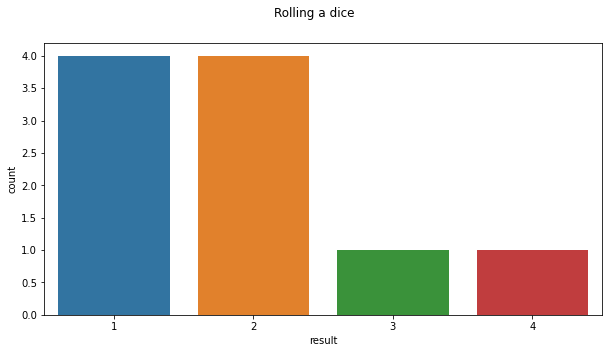

In [4]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Rolling a dice') 

sns.barplot(data=roll_freq, 
            x='result',
            y='count')

plt.show()

In [ ]:
"""
your comments here
"""

'''
Both charts have the same shape. 
The same behavior is represented: the total times a number is on multiple rolls of a dice.
'''


## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [5]:
# your code here

def get_mean(arr):
    m = sum(arr) / len(arr)
    return m


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

mean = get_mean(roll_dice['result'])
print(f'mean is: {mean}')

mean is: 1.9


In [7]:
roll_dice['result'].mean()

1.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here

def get_median(arr):
    arr_sorted = arr.sort_values().reset_index(drop=True)
    pos = int(len(arr_sorted) / 2)
    # if len is even
    if len(arr_sorted) % 2 == 0:
        m = get_mean(arr_sorted[pos-1:pos+1])
    # if len is odd
    else:
        m = arr_sorted[pos]
    
    return m, pos


In [9]:
median, pos = get_median(roll_dice['result'])
print(f'median is: {median}')

median is: 2.0


In [10]:
roll_dice['result'].median()

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here

def get_quertiles(arr):
    arr_sorted = arr.sort_values().reset_index(drop=True)
    m, pos = get_median(arr_sorted)
    q1, pos1 = get_median(arr_sorted[:pos])
    q3, pos3 = get_median(arr_sorted[pos+1:])
    
    return q1, m, q3


In [12]:
q1, q2, q3 = get_quertiles(roll_dice['result'])
print(f'q1 is: {q1} \nq2 is: {q2} \nq3 is: {q3}')

q1 is: 1 
q2 is: 2.0 
q3 is: 2.5


In [13]:
roll_dice['result'].describe()

count    10.000000
mean      1.900000
std       0.994429
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: result, dtype: float64

In [14]:
np.quantile(roll_dice['result'], [0.25,0.5,0.75])

array([1., 2., 2.])

In [15]:
roll_dice['result'].sort_values()

0    1
5    1
6    1
7    1
1    2
2    2
3    2
9    2
8    3
4    4
Name: result, dtype: int64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [16]:
# your code here

roll_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_hundred

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


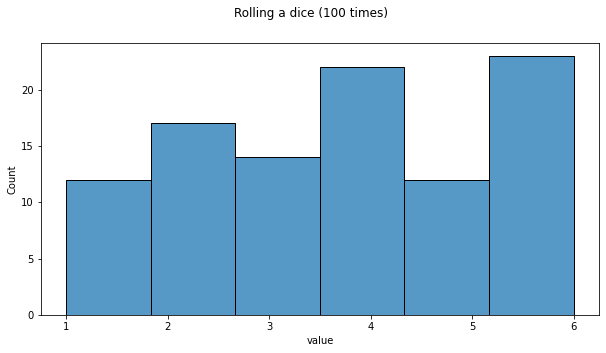

In [17]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Rolling a dice (100 times)') 

sns.histplot(data=roll_hundred, 
             x='value',
             bins=6)

plt.show()

In [ ]:
"""
your comments here
"""

'''
The total times a number is on hundred rolls of a dice.
Number 6 is the most frequently.
Number 4 is the next most frequently, very close from 6.
The next number is two and then number three.
Number one and number five are the less frequently, both have the same number of times (very near from number three).

'''


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [18]:
# your code here

mean_hundred = get_mean(roll_hundred['value'])
print(f'mean is: {mean_hundred}')

mean is: 3.74


In [19]:
roll_hundred['value'].mean()

3.74

#### 3.- Now, calculate the frequency distribution.


In [20]:
# your code here

roll_freq_hundred = pd.DataFrame(roll_hundred.groupby(['value'])['value'].count()).rename(columns={'value': 'count'}).reset_index()
roll_freq_hundred


,value,count
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

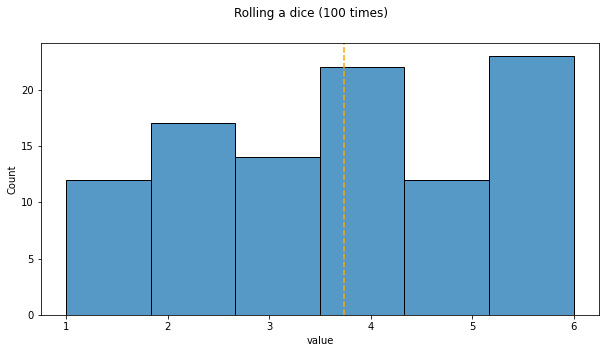

In [21]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Rolling a dice (100 times)') 

sns.histplot(data=roll_hundred, 
             x='value',
             bins=6)

plt.axvline(mean_hundred, color='orange', linestyle='dashed')

plt.show()

In [ ]:
"""
your comments here
"""

'''
Comments point 1. The most frequently is number 6 (number 4 very close). The less frequently number 1 and 5.
The fixed line included in chart is mean of values of frequency.
'''

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [22]:
# your code here

roll_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_thousand


,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [23]:
mean_thousand = get_mean(roll_thousand['value'])
print(f'mean is: {mean_thousand}')

mean is: 3.447


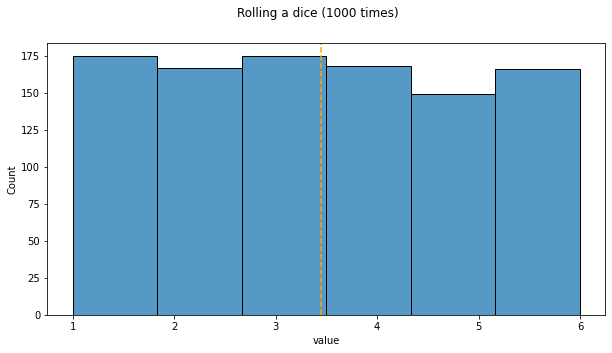

In [24]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Rolling a dice (1000 times)') 

sns.histplot(data=roll_thousand, 
             x='value',
             bins=6)

plt.axvline(mean_thousand, color='orange', linestyle='dashed')

plt.show()

In [ ]:
"""
your comments here
"""

'''
The number of times of every number is similar. 
If more times the dice is rolled, more similar is the number of times of every number.
Mean will be closer than real mean (3.5)
'''

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [25]:
# your code here

ages_pop = pd.read_csv('../data/ages_population.csv')
ages_pop

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


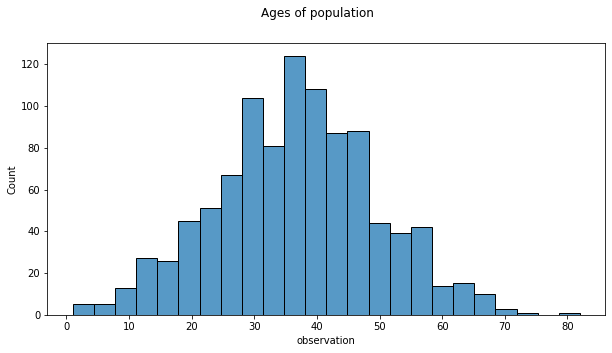

In [26]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Ages of population') 

sns.histplot(data=ages_pop, 
             x='observation')

plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [27]:
# your code here

mean_age = ages_pop['observation'].mean()
std_age = np.std(ages_pop['observation'])
print(f'mean is: {mean_age} \nstd is: {std_age}')


mean is: 36.56 
std is: 12.81008977329979


In [ ]:
"""
your comments here
"""

'''
The sample is normalized. 
Mean is about 40, because central value is 40 and the sample is normalized.
Standard deviation is about 10, they are bins represented in chart.
'''

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [28]:
# your code here

ages_pop2 = pd.read_csv('../data/ages_population2.csv')
ages_pop2


,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


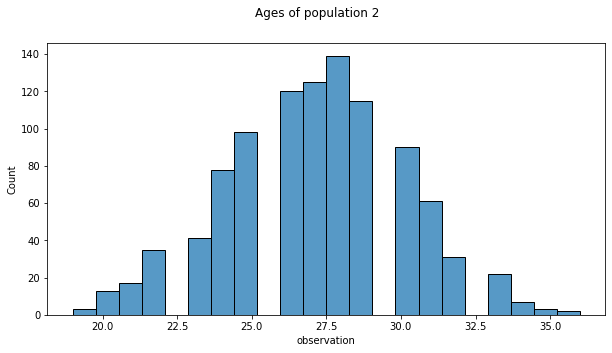

In [29]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Ages of population 2') 

sns.histplot(data=ages_pop2, 
             x='observation')

plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

'''
Younger population.
The mean has to be lower (about 27).
And standard deviation too (about 2.5, distance between bins).
'''

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [30]:
# your code here

mean_age2 = ages_pop2['observation'].mean()
std_age2 = np.std(ages_pop2['observation'])
print(f'mean is: {mean_age2} \nstd is: {std_age2}')


mean is: 27.155 
std is: 2.9683286543103704


In [ ]:
"""
your comments here
"""

'''
The mean is lower because population is younger.
Standard deviation is lower too, because datas are closer. Nearer from mean than sample in step2.
'''

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [32]:
# your code here

ages_pop3 = pd.read_csv('../data/ages_population3.csv')
ages_pop3


,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


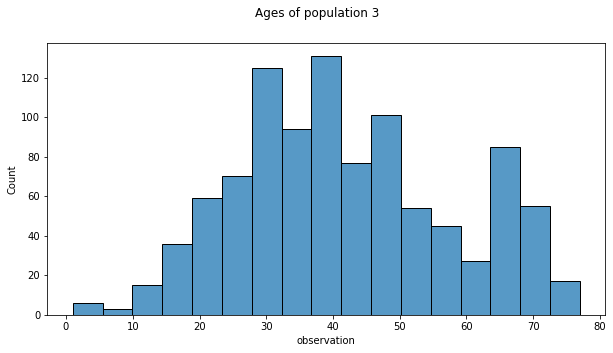

In [33]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Ages of population 3') 

sns.histplot(data=ages_pop3, 
             x='observation')

plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [34]:
# your code here

mean_age3 = ages_pop3['observation'].mean()
std_age3 = np.std(ages_pop3['observation'])
print(f'mean is: {mean_age3} \nstd is: {std_age3}')


mean is: 41.989 
std is: 16.136631587788084


In [ ]:
"""
your comments here
"""

'''
There are more older people.
Mean higher.
Standard deviation higher too, there are more people far from mean.
'''

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [35]:
# your code here

np.quantile(ages_pop3['observation'], [0.25,0.5,0.75])


array([30., 40., 53.])

In [ ]:
"""
your comments here
"""

'''
Mean a little higher than median, population is distributed with more people in higher values.
You can see difference Q1 and median and difference Q3 and median, 
difference with Q3 is greater because there are more older people than median.
'''

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [36]:
# your code here

ages_pop3['observation'].describe()


count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [ ]:
"""
your comments here
"""

'''
Difference median with max value is greater than difference median with min value.
Other reason mean is greater than median.
'''

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

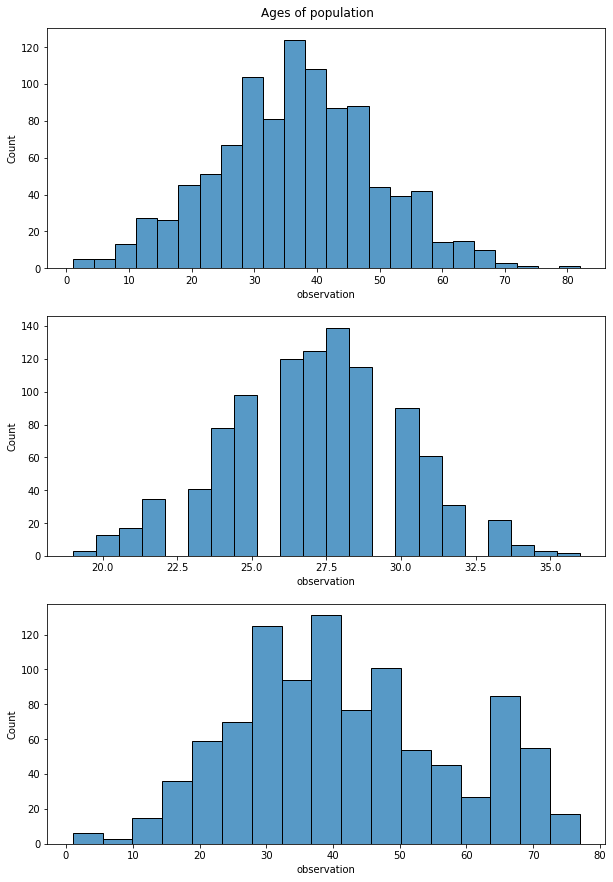

In [37]:
# your code here

fig, axs = plt.subplots(ncols=1,
                        nrows=3,
                        figsize=(10, 15))

fig.suptitle('Ages of population', y=0.9) 

plt.sca(axs[0])
sns.histplot(data=ages_pop, 
             x='observation')

plt.sca(axs[1])
sns.histplot(data=ages_pop2, 
             x='observation')

plt.sca(axs[2])
sns.histplot(data=ages_pop3, 
             x='observation')

plt.show()

In [38]:
print('mean      ', ages_pop['observation'].mean())
ages_pop['observation'].describe()

mean       36.56


count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

In [39]:
print('mean      ', ages_pop2['observation'].mean())
ages_pop2['observation'].describe()

mean       27.155


count    1000.000000
mean       27.155000
std         2.969814
min        19.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: observation, dtype: float64

In [40]:
print('mean      ', ages_pop3['observation'].mean())
ages_pop3['observation'].describe()

mean       41.989


count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [ ]:
"""
your comments here

In first sample (population 1), there is the oldest and youngest people, but population isn't the oldest in mean.
Population 3 is the oldest in mean, pop3 has same min value than pop1 and lower max value.
However, you can see median and Q3 are higher in pop3. Right-hand-side distributed population (more older people).
Other samples (pop1 and pop2) is a normal distribution, mean an median is very similar.
Population 2 is the youngest in mean. 
Max value is youngest value than others samples, however min value isn't minimun. 
Pop2 has a normal distribution. Mean and median is very similar.
"""